# ::: Restaurant Food Cost :::

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score ,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [126]:
df = pd.read_excel('Data_Train.xlsx')
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [127]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

Data Cleaning Start

Filing None values in City adn Locality

In [128]:
df['CITY']=df['CITY'].fillna('Other')

In [129]:
df['LOCALITY']=df['LOCALITY'].fillna('Other')

In [130]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


Taking only Numkerical values out the columns usiong regex with str.extract function and filling None values with 0

In [131]:
df['VOTES'] = df['VOTES'].str.extract('(\d+)').astype(float)
df['VOTES'].fillna(0, inplace=True)

In [132]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546.0,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214.0,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608.0,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32.0,400


In [133]:
df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           2
VOTES            0
COST             0
dtype: int64

## Removing some special values from Rating Column 

1. - with 0
2. NEW with 0
3. None with Median of Rating Columns

In [134]:
df['RATING'] = df['RATING'].str.replace('-', '0')

In [135]:
df['RATING'] = df['RATING'].str.replace('NEW', '0')

In [136]:
df['RATING'].fillna(df['RATING'].median(), inplace=True)

In [137]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546.0,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214.0,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608.0,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32.0,400


In [138]:
df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

Data Cleaning Finished

<Axes: >

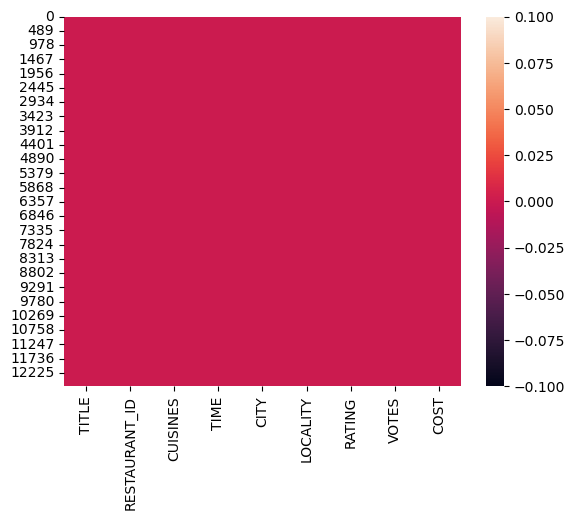

In [139]:
sns.heatmap(df.isnull())

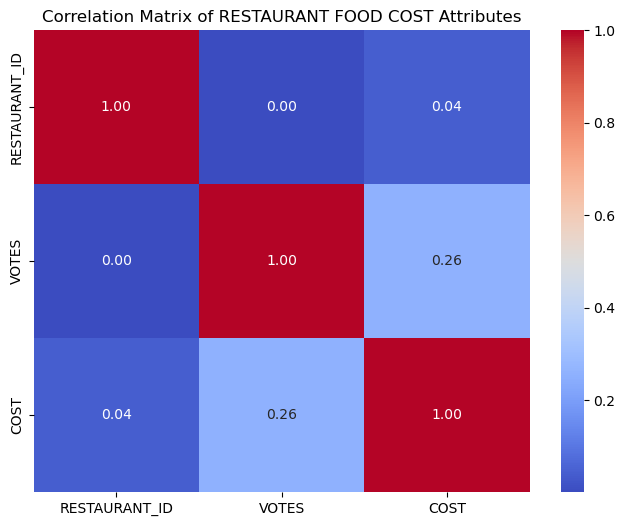

In [140]:
plt.figure(figsize=(8,6),facecolor="white")
sns.heatmap(df.corr(),annot=True,fmt='0.2f',cmap='coolwarm',linecolor="black",cbar=True)
plt.title("Correlation Matrix of RESTAURANT FOOD COST Attributes")
plt.show()

In [141]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546.0,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214.0,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608.0,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32.0,400


Data Processing Start

In [142]:
label_encoder = LabelEncoder()

In [143]:
df['CUISINES'] = label_encoder.fit_transform(df['CUISINES'])

In [144]:
df['CITY'] = label_encoder.fit_transform(df['CITY'])

In [145]:
df['LOCALITY'] = label_encoder.fit_transform(df['LOCALITY'])

In [146]:
df['TIME'] = label_encoder.fit_transform(df['TIME'])

In [147]:
df = df.drop(columns=['TITLE'])

In [148]:
df

,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,9438,2627,739,321,285,3.6,49.0,1200
1,13198,289,1885,67,1047,4.2,30.0,1500
2,10915,2976,661,67,1102,3.8,221.0,800
3,6346,4130,275,222,136,4.1,24.0,800
4,15387,1766,615,222,620,3.8,165.0,300
...,...,...,...,...,...,...,...,...
12685,13228,2934,1144,131,342,3.8,546.0,500
12686,9686,2143,1177,222,133,4.3,1214.0,1800
12687,11133,2088,1137,239,1343,4.0,608.0,1300
12688,6134,3506,1837,67,631,3.5,32.0,400


Data Processing End

Data Modeling

In [149]:
linear_regression=LinearRegression()

In [150]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [151]:
x

,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,9438,2627,739,321,285,3.6,49.0
1,13198,289,1885,67,1047,4.2,30.0
2,10915,2976,661,67,1102,3.8,221.0
3,6346,4130,275,222,136,4.1,24.0
4,15387,1766,615,222,620,3.8,165.0
...,...,...,...,...,...,...,...
12685,13228,2934,1144,131,342,3.8,546.0
12686,9686,2143,1177,222,133,4.3,1214.0
12687,11133,2088,1137,239,1343,4.0,608.0
12688,6134,3506,1837,67,631,3.5,32.0


In [152]:
y

0        1200
1        1500
2         800
3         800
4         300
         ... 
12685     500
12686    1800
12687    1300
12688     400
12689     600
Name: COST, Length: 12690, dtype: int64

In [153]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [154]:
linear_regression.fit(x_train,y_train)

LinearRegression()

In [155]:
y_pred = linear_regression.predict(x_test)

In [156]:
y_pred

array([656.80296884, 719.91098497, 842.70803503, ..., 571.29896873,
       575.25335728, 963.19541782])

In [157]:
mse = mean_squared_error(y_test,y_pred)

In [158]:
mse

319918.0356074663

In [159]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 319918.0356074663
R-squared: 0.11109155582214392


Testing Prepared Model

In [160]:
df_test = pd.read_excel('Data_Test.xlsx')
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [161]:
df_test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [162]:
df_test['CUISINES'] = label_encoder.fit_transform(df_test['CUISINES'])
df_test['CITY'] = label_encoder.fit_transform(df_test['CITY'])
df_test['LOCALITY'] = label_encoder.fit_transform(df_test['LOCALITY'])
df_test['TIME'] = label_encoder.fit_transform(df_test['TIME'])
df_test = df_test.drop(columns=['TITLE'])

In [163]:
df_test

,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,4085,1293,503,110,662,4.3,564 votes
1,12680,1632,933,96,221,4.2,61 votes
2,1411,1455,219,96,411,3.8,350 votes
3,204,208,1071,41,456,3.8,1445 votes
4,13453,1637,208,78,300,3.6,23 votes
...,...,...,...,...,...,...,...
4226,9057,1425,103,108,597,3.9,287 votes
4227,1247,267,262,9,237,4.3,469 votes
4228,8617,679,1052,41,696,3.7,53 votes
4229,6485,1541,215,78,332,-,NaN


In [164]:
df_test['VOTES'] = df_test['VOTES'].str.extract('(\d+)').astype(float)
df_test['VOTES'].fillna(0, inplace=True)

In [165]:
df_test['RATING'] = df_test['RATING'].str.replace('-', '0')
df_test['RATING'] = df_test['RATING'].str.replace('NEW', '0')
df_test['RATING'].fillna(df_test['RATING'].median(), inplace=True)

In [166]:
df_test

,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,4085,1293,503,110,662,4.3,564.0
1,12680,1632,933,96,221,4.2,61.0
2,1411,1455,219,96,411,3.8,350.0
3,204,208,1071,41,456,3.8,1445.0
4,13453,1637,208,78,300,3.6,23.0
...,...,...,...,...,...,...,...
4226,9057,1425,103,108,597,3.9,287.0
4227,1247,267,262,9,237,4.3,469.0
4228,8617,679,1052,41,696,3.7,53.0
4229,6485,1541,215,78,332,0,0.0


In [167]:
y_pred_test = linear_regression.predict(df_test)

In [169]:
y_pred_test

array([735.87358371, 695.7049491 , 630.96408102, ..., 614.10155847,
       224.96615228, 566.88000186])